# Importing the necessary library

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Datasets

In [8]:
df=pd.read_csv('dataset/dress_rental_prices.csv', encoding='latin1')
df

Unnamed: 0     ID                            Name             Brand  \
0              0  74416             Runway stripe dress  Stella McCartney   
1              1  73815      Reformation Kourtney Dress       Reformation   
2              2  73801        Ivory Viola bridal dress             Ghost   
3              3  73718         Pasu Dress - Rhino Tusk            Coucoo   
4              4  73605                           Ellen              RIXO   
...          ...    ...                             ...               ...   
5996        5996  53420              The Goddess Dress        valle & vik   
5997        5997  53717  Perry V-neck silk-stretch wrap     MOTHER OF ALL   
5998        5998  53890  The Kinsley Maxi Dress in Turq     Solace London   
5999        5999  53944          Cosmo teal ombré dress               Aje   
6000        6000  53962     SS18 SHEER SEQUIN BLUE MIDI           Vivetta   

     Colour Catagories  Price  
0     beige    dresses    111  
1     beige    dresses     50  
2     beige    dresses     75  
3     beige    dresses     37  
4     beige    dresses     47  
...     ...        ...    ...  
5996   blue    dresses     78  
5997   blue    dresses     70  
5998   blue    dresses     93  
5999   blue    dresses     66  
6000   blue    dresses     73  

[6001 rows x 7 columns]

In [9]:
df.head()

Unnamed: 0     ID                        Name             Brand Colour  \
0           0  74416         Runway stripe dress  Stella McCartney  beige   
1           1  73815  Reformation Kourtney Dress       Reformation  beige   
2           2  73801    Ivory Viola bridal dress             Ghost  beige   
3           3  73718     Pasu Dress - Rhino Tusk            Coucoo  beige   
4           4  73605                       Ellen              RIXO  beige   

  Catagories  Price  
0    dresses    111  
1    dresses     50  
2    dresses     75  
3    dresses     37  
4    dresses     47

# Describing datasets

In [11]:
df.describe()

Unnamed: 0            ID        Price
count  6001.000000   6001.000000  6001.000000
mean   3000.000000  42942.765206    64.689052
std    1732.483814  19480.256433    39.876333
min       0.000000    223.000000    11.000000
25%    1500.000000  27358.000000    41.000000
50%    3000.000000  45506.000000    53.000000
75%    4500.000000  59324.000000    73.000000
max    6000.000000  74540.000000   707.000000

# Vision over a columns in a datasets

In [13]:
list(df.columns)

['Unnamed: 0', 'ID', 'Name', 'Brand', 'Colour', 'Catagories', 'Price']

# Finding missing value

In [15]:
df.isnull().sum()

Unnamed: 0     0
ID             0
Name           0
Brand          0
Colour         0
Catagories    23
Price          0
dtype: int64

# Listing the categorical and the numerical columns

In [17]:
categorical_columns=df.select_dtypes(include=['category','object']).columns
numerical_columns=df.select_dtypes(exclude=['category','object']).columns

In [18]:
df['Brand'].mode()[0]

'Self-Portrait'

In [19]:
df['Brand'].value_counts()

Brand
Self-Portrait       449
RIXO                448
Ganni               278
Rat & Boa           215
House of CB         214
                   ... 
Emporio Armani        1
Maggie Marilyn        1
Maids to Measure      1
Susan Fang            1
Vivetta               1
Name: count, Length: 552, dtype: int64

# Filling the missing values in a categorical columns

# Before missing values in a categorical columns

In [22]:
df[categorical_columns].isnull().sum()

Name           0
Brand          0
Colour         0
Catagories    23
dtype: int64

In [23]:
df[categorical_columns]=df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

In [24]:
df[categorical_columns].isnull().sum()

Name          0
Brand         0
Colour        0
Catagories    0
dtype: int64

# Finding the missing values of numerical columns with mean or mode

In [26]:
df[numerical_columns].isnull().sum()

Unnamed: 0    0
ID            0
Price         0
dtype: int64

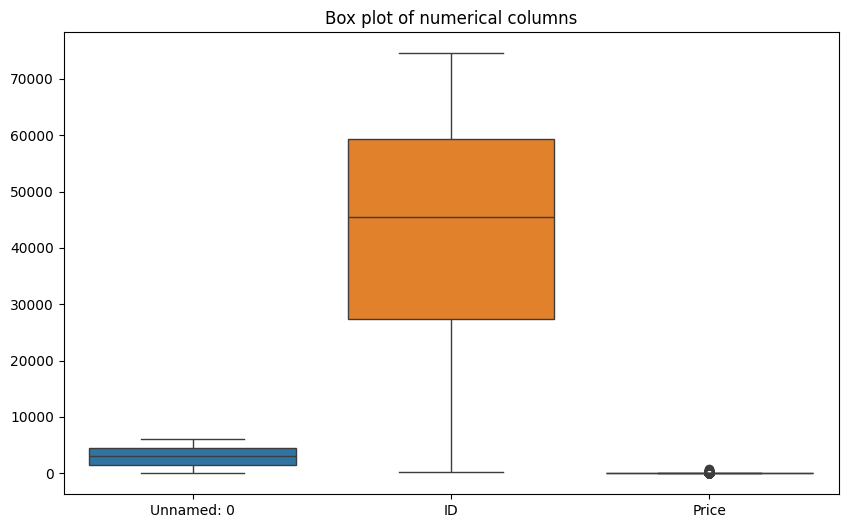

In [27]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[numerical_columns])
plt.xticks(rotation=360)
plt.title('Box plot of numerical columns')
plt.show()

In [28]:
df[numerical_columns]=df[numerical_columns].fillna(df[numerical_columns].mean())

In [29]:
df[numerical_columns].isnull().sum()

Unnamed: 0    0
ID            0
Price         0
dtype: int64

In [30]:
df['Price'].mean()

np.float64(64.68905182469588)

In [31]:
df['Price'].median()

np.float64(53.0)

In [32]:
df[numerical_columns].head()

Unnamed: 0     ID  Price
0           0  74416    111
1           1  73815     50
2           2  73801     75
3           3  73718     37
4           4  73605     47

In [33]:
df[categorical_columns].head()

Name             Brand Colour Catagories
0         Runway stripe dress  Stella McCartney  beige    dresses
1  Reformation Kourtney Dress       Reformation  beige    dresses
2    Ivory Viola bridal dress             Ghost  beige    dresses
3     Pasu Dress - Rhino Tusk            Coucoo  beige    dresses
4                       Ellen              RIXO  beige    dresses

In [34]:
import scipy.stats as stats

# Create a figure and axes for subplots

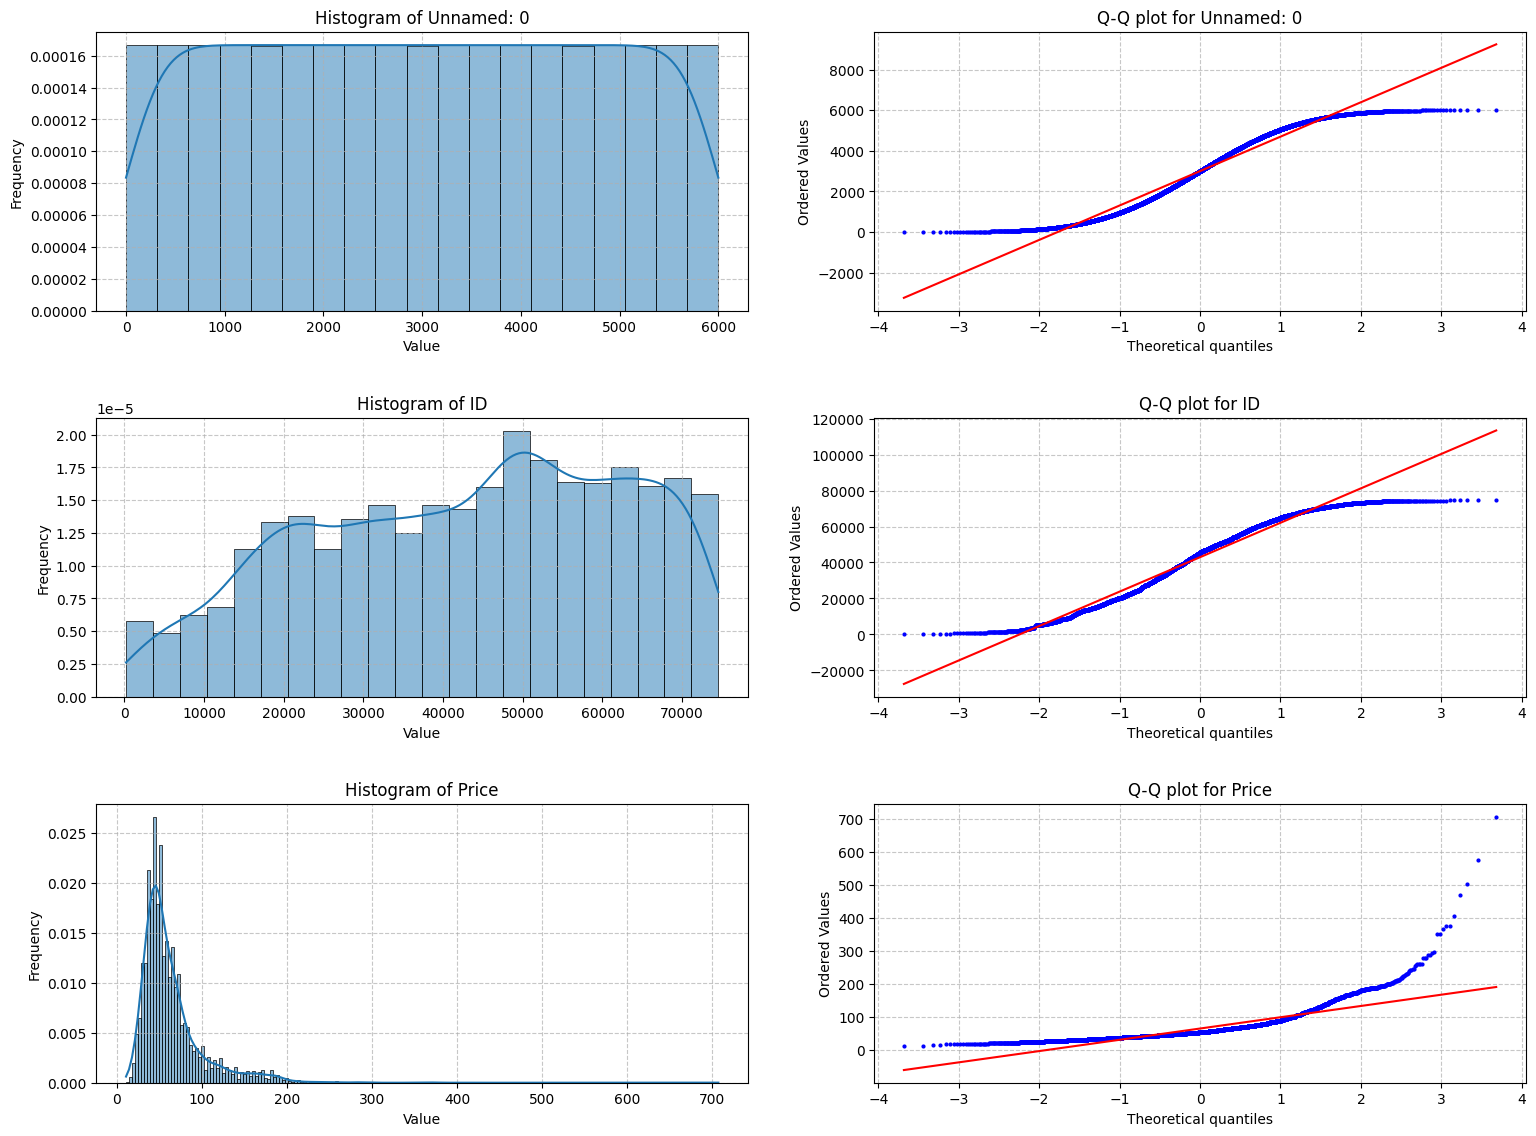

In [36]:
num_cols=len(numerical_columns)
fig,axes=plt.subplots(num_cols,2,figsize=(16,num_cols*4))

# Plotting histograms and Q-Q plots for each numerical columns
for i,col in enumerate (numerical_columns):
    # Histogram on the left sunplot
    sns.histplot(df[col],kde=True,ax=axes[i,0],stat='density',linewidth=0.5)
    axes[i,0].set_title(f'Histogram of {col}')
    axes[i,0].set_xlabel('Value')
    axes[i,0].set_ylabel('Frequency')
    axes[i,0].grid(True,linestyle='--',alpha=0.7)

    # Q-Q plot on the right subplot
    stats.probplot(df[col],plot=axes[i,1],dist='norm',fit=True)
    axes[i,1].get_lines()[0].set_markersize(2.0) #Adjust the marker size
    axes[i,1].grid(True,linestyle='--',alpha=0.7)
    axes[i,1].set_title(f'Q-Q plot for {col}')

# Adjust layout and display the plots
plt.tight_layout(pad=3.0)
plt.show()
    



In [117]:
def plotHistogram(df_column_name, bin_num=10, title='Histogram'):
    plt.figure(figsize=(10, 6))
    plt.hist(df_column_name, bins=bin_num, edgecolor='black')
    plt.title(title)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()
    

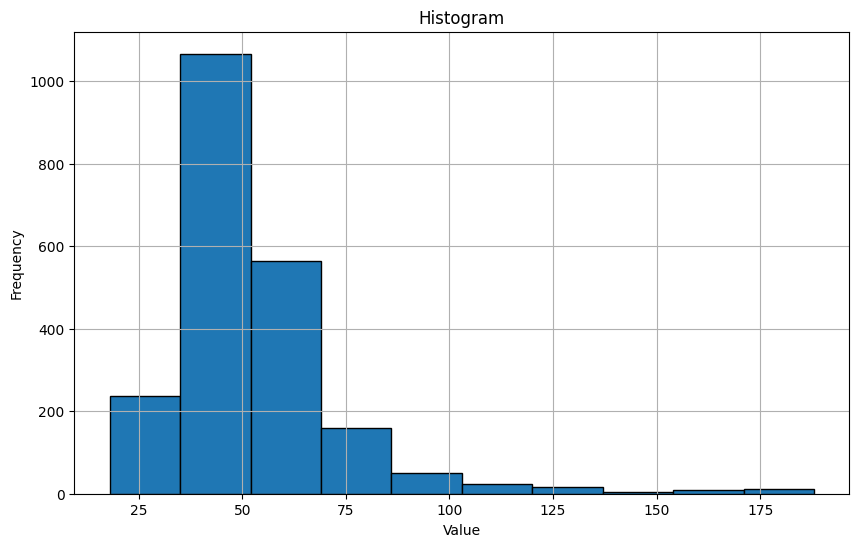

In [119]:
plotHistogram(filtered_df['Price'])

In [151]:
# Assuming brand_counts is a series with the count of each brand
brand_counts = df['Brand'].value_counts()

# Get the top 5 brands
top_brands = brand_counts.head(5).index.tolist()



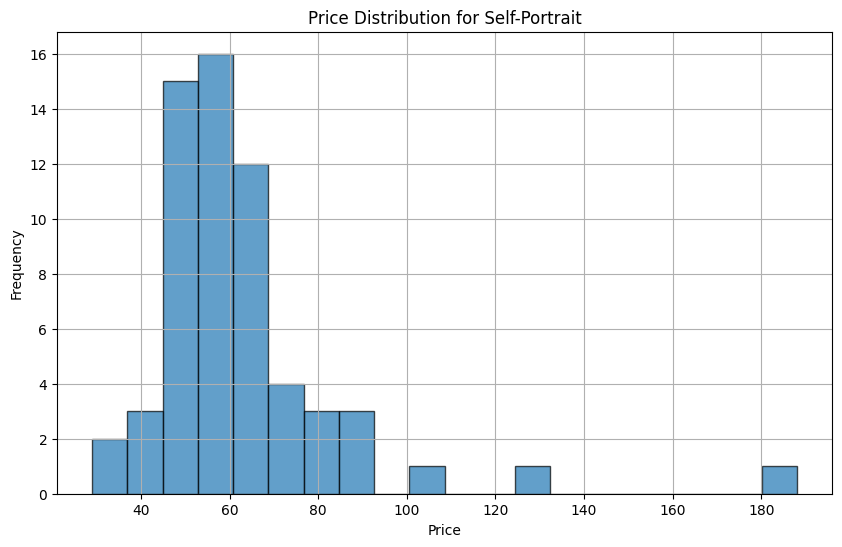

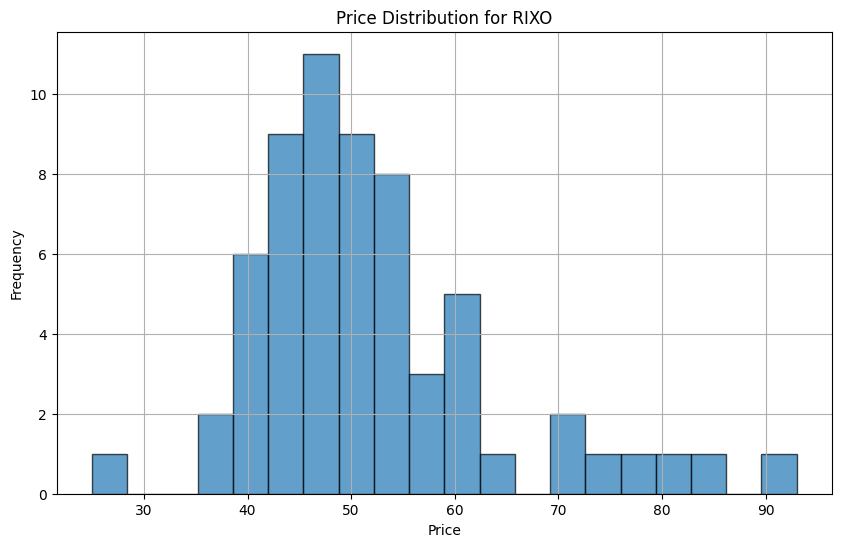

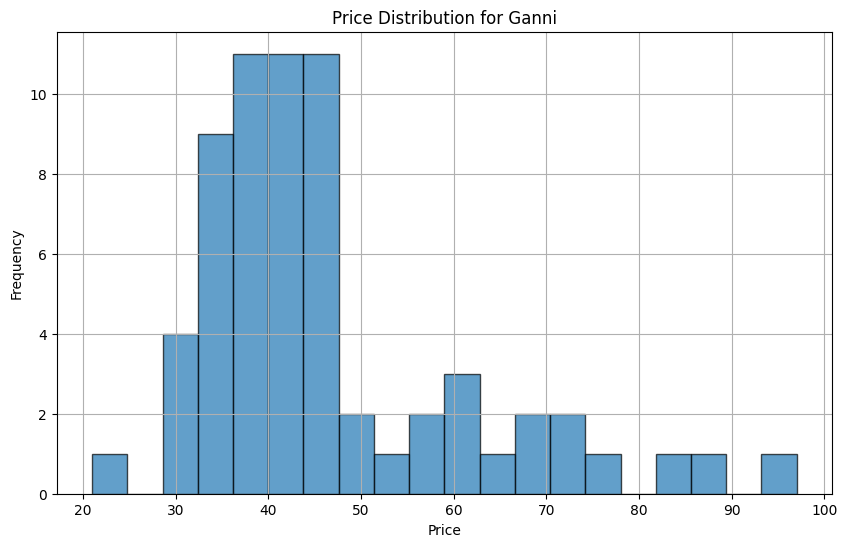

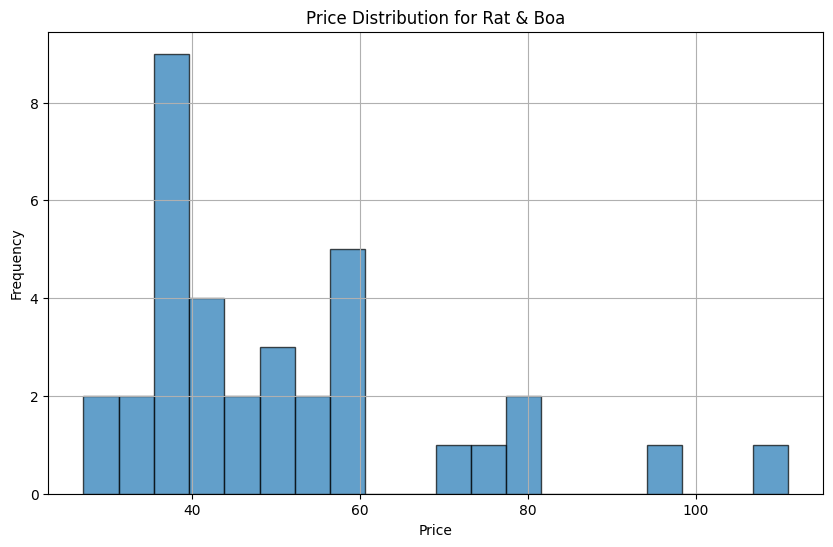

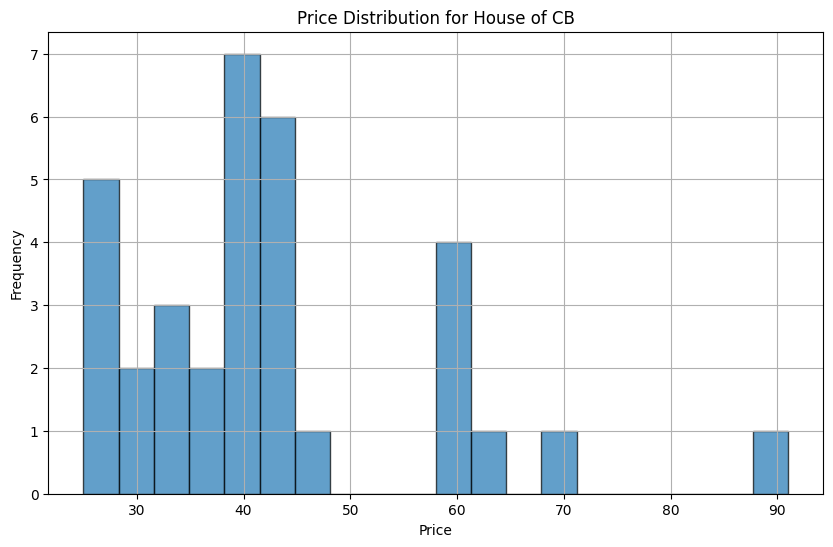

DataFrame Columns: Index(['Unnamed: 0', 'ID', 'Name', 'Brand', 'Colour', 'Catagories', 'Price',
       'available'],
      dtype='object')


In [153]:
# Iterate over the top brands and plot histograms for Beige-colored items
for brand in top_brands:
    temp_df = df.loc[(df['Brand'] == brand) & (df['Colour'] == 'beige')]
    if not temp_df.empty:
        plotHistogram(temp_df['Price'], 20, brand)
    else:
        print(f"No data for brand '{brand}' with colour 'beige'")

# Display DataFrame columns for verification
print("DataFrame Columns:", df.columns)

# Statistical Tests

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import anderson, jarque_bera, shapiro,normaltest,kstest
from statsmodels.stats.diagnostic import lilliefors  # Corrected import

# Function to perform normality tests
def test_normality(df,col):
    print(f'Column: {col}')

   # Shapiro-Wilk test
    stat_shapiro, p_shapiro = shapiro(df[col])
    print(f'Shapiro-Wilk Test: Statistics={stat_shapiro:.3f}, p-value={p_shapiro:.3f}')
    if p_shapiro > 0.05:
        print(f'Shapiro-Wilk Test: {col} looks normally distributed (fail to reject H0)')
    else:
        print(f'Shapiro-Wilk Test: {col} does not look normally distributed (reject H0)')

    
    # Anderson-Darling test
    result_anderson=anderson(df[col])
    print(f'Anderson-Darling Test: Statistics= {result_anderson.statistic:.3f}')
    print(f'Anderson-Darling Test: Critical Values: {result_anderson.critical_values}')
    if result_anderson .statistic<result_anderson.critical_values[2]:
        print(f'Anderson-Darling Test: {col} looks normally distributed ( fil to reject H0)')
    else: 
        print(f'Anderson-Darling Test: {col} does not look normally distributed ( reject H0)')



    # Jarque-Bera test
    jb_stat, p_val_jb = jarque_bera(df[col])
    print(f'Jarque-Bera Test: JB statistic={jb_stat:.3f}, p-value={p_val_jb:.3f}')
    if p_val_jb > 0.05:
        print(f'Jarque-Bera Test: {col} looks normally distributed (fail to reject H0)')
    else:
        print(f'Jarque-Bera Test: {col} does not look normally distributed (reject H0)')

# D'Agostino and Pearson's test
    stat_agostino, p_agostino = normaltest(df[col])
    print(f"D'Agostino and Pearson's Test: Statistics={stat_agostino:.3f}, p-value={p_agostino:.3f}")
    if p_agostino > 0.05:
        print(f"D'Agostino and Pearson's Test: {col} looks normally distributed (fail to reject H0)")
    else:
        print(f"D'Agostino and Pearson's Test: {col} does not look normally distributed (reject H0)")
    
    # Kolmogorov-Smirnov test
    ks_stat, p_ks = kstest(df[col], 'norm')
    print(f'Kolmogorov-Smirnov Test: KS statistic={ks_stat:.3f}, p-value={p_ks:.3f}')
    if p_ks > 0.05:
        print(f'Kolmogorov-Smirnov Test: {col} looks normally distributed (fail to reject H0)')
    else:
        print(f'Kolmogorov-Smirnov Test: {col} does not look normally distributed (reject H0)')
    
    # Lilliefors test
    stat_lilliefors, p_lilliefors = lilliefors(df[col])
    print(f'Lilliefors Test: Statistics={stat_lilliefors:.3f}, p-value={p_lilliefors:.3f}')
    if p_lilliefors > 0.05:
        print(f'Lilliefors Test: {col} looks normally distributed (fail to reject H0)')
    else:
        print(f'Lilliefors Test: {col} does not look normally distributed (reject H0)')
    
    print('\n')


# Perform normality tests for each numerical column
for col in numerical_columns:
    test_normality(df, col)


Column: Unnamed: 0
Shapiro-Wilk Test: Statistics=0.955, p-value=0.000
Shapiro-Wilk Test: Unnamed: 0 does not look normally distributed (reject H0)
Anderson-Darling Test: Statistics= 66.692
Anderson-Darling Test: Critical Values: [0.576 0.656 0.786 0.917 1.091]
Anderson-Darling Test: Unnamed: 0 does not look normally distributed ( reject H0)
Jarque-Bera Test: JB statistic=360.060, p-value=0.000
Jarque-Bera Test: Unnamed: 0 does not look normally distributed (reject H0)
D'Agostino and Pearson's Test: Statistics=5148.056, p-value=0.000
D'Agostino and Pearson's Test: Unnamed: 0 does not look normally distributed (reject H0)
Kolmogorov-Smirnov Test: KS statistic=0.999, p-value=0.000
Kolmogorov-Smirnov Test: Unnamed: 0 does not look normally distributed (reject H0)
Lilliefors Test: Statistics=0.057, p-value=0.001
Lilliefors Test: Unnamed: 0 does not look normally distributed (reject H0)


Column: ID
Shapiro-Wilk Test: Statistics=0.964, p-value=0.000
Shapiro-Wilk Test: ID does not look normal

C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6001.
  res = hypotest_fun_out(*samples, **kwds)


# Function to detect outliers using IQR method and return column-wise boolean indicators

In [40]:
def find_outliers_iqr(data):
    outliers_mask=pd.Series(index=data.columns, dtype=bool)
    for col in data.columns:
        if col in numerical_columns:
           Q1 = data[col].quantile(0.25)
           Q3 = data[col].quantile(0.75)
           IQR = Q3-Q1
           lower_bound = Q1-1.5*IQR
           upper_bound = Q1+1.5*IQR
           col_outliers_mask = (data[col] < lower_bound)|(data[col]>upper_bound)
           outliers_mask[col]=col_outliers_mask.any()
    return outliers_mask

outliers_iqr_mask = find_outliers_iqr(df)
print("Outliers detected using IQR method:")
for col, is_outliers in outliers_iqr_mask.items():
    print(f"{col}:{is_outliers}")



Outliers detected using IQR method:
Unnamed: 0:False
ID:False
Name:True
Brand:True
Colour:True
Catagories:True
Price:True


In [41]:
def find_outliers_iqe(data):
    outliers_mask=pd.Series(index=data.columns, dtype=bool)
    for col in data.columns:
        if col in numerical_columns:
           Q1 = data[col].quantile(0.25)
           Q3 = data[col].quantile(0.75)
           IQR = Q3-Q1
           lower_bound = Q1-1.5*IQR
           upper_bound = Q1+1.5*IQR
           col_outliers_mask = (data[col] < lower_bound)|(data[col]>upper_bound)
           outliers_mask[col]=col_outliers_mask.any()
    return outliers_mask

outliers_iqr_mask = find_outliers_iqr(df)
print("Outliers detected using IQR method:")
for col, is_outliers in outliers_iqr_mask.items():
    print(f"{col}:{is_outliers}")
def find_outliers_zscore(data, threshold=3):
    outliers_mask = pd.Series(index=data.columns, dtype=bool)

    for col in data.columns:
        if col in numerical_columns:  # Process only numerical columns
            mean = np.mean(data[col])
            std_dev = np.std(data[col])
            z_scores = np.abs((data[col] - mean) / std_dev)
            col_outliers_mask = z_scores > threshold
            outliers_mask[col] = col_outliers_mask.any()  # True if any outliers detected

    return outliers_mask

outliers_zscore_mask = find_outliers_zscore(df)
print("\nOutliers detected using Z-score method:")
for col, is_outlier in outliers_zscore_mask.items():
    print(f"{col}: {is_outlier}")



Outliers detected using IQR method:
Unnamed: 0:False
ID:False
Name:True
Brand:True
Colour:True
Catagories:True
Price:True

Outliers detected using Z-score method:
Unnamed: 0: False
ID: False
Name: True
Brand: True
Colour: True
Catagories: True
Price: True


# Function to remove outliers using IQR method

In [43]:
def remove_outliers_iqr(data):
    cleaned_data = data.copy()

    for col in data.columns:
        if col in numerical_columns:  # Process only numerical columns
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            cleaned_data = cleaned_data[(cleaned_data[col] >= lower_bound) & (cleaned_data[col] <= upper_bound)]

    return cleaned_data

cleaned_data_iqr = remove_outliers_iqr(df)
print("DataFrame after removing outliers using IQR method:")
print(cleaned_data_iqr)

DataFrame after removing outliers using IQR method:
      Unnamed: 0     ID                            Name             Brand  \
0              0  74416             Runway stripe dress  Stella McCartney   
1              1  73815      Reformation Kourtney Dress       Reformation   
2              2  73801        Ivory Viola bridal dress             Ghost   
3              3  73718         Pasu Dress - Rhino Tusk            Coucoo   
4              4  73605                           Ellen              RIXO   
...          ...    ...                             ...               ...   
5996        5996  53420              The Goddess Dress        valle & vik   
5997        5997  53717  Perry V-neck silk-stretch wrap     MOTHER OF ALL   
5998        5998  53890  The Kinsley Maxi Dress in Turq     Solace London   
5999        5999  53944          Cosmo teal ombré dress               Aje   
6000        6000  53962     SS18 SHEER SEQUIN BLUE MIDI           Vivetta   

     Colour Catagories 

# Function to remove outliers using Z-score method

In [45]:
def remove_outliers_zscore(data, threshold=3):
    cleaned_data = data.copy()

    for col in data.columns:
        if col in numerical_columns:  # Process only numerical columns
            mean = np.mean(data[col])
            std_dev = np.std(data[col])
            z_scores = np.abs((data[col] - mean) / std_dev)
            cleaned_data = cleaned_data[z_scores <= threshold]

    return cleaned_data

cleaned_data_zscore = remove_outliers_zscore(df)
print("\nDataFrame after removing outliers using Z-score method:")
print(cleaned_data_zscore)


DataFrame after removing outliers using Z-score method:
      Unnamed: 0     ID                            Name             Brand  \
0              0  74416             Runway stripe dress  Stella McCartney   
1              1  73815      Reformation Kourtney Dress       Reformation   
2              2  73801        Ivory Viola bridal dress             Ghost   
3              3  73718         Pasu Dress - Rhino Tusk            Coucoo   
4              4  73605                           Ellen              RIXO   
...          ...    ...                             ...               ...   
5996        5996  53420              The Goddess Dress        valle & vik   
5997        5997  53717  Perry V-neck silk-stretch wrap     MOTHER OF ALL   
5998        5998  53890  The Kinsley Maxi Dress in Turq     Solace London   
5999        5999  53944          Cosmo teal ombré dress               Aje   
6000        6000  53962     SS18 SHEER SEQUIN BLUE MIDI           Vivetta   

     Colour Catago

# Exploytary Data Analysis

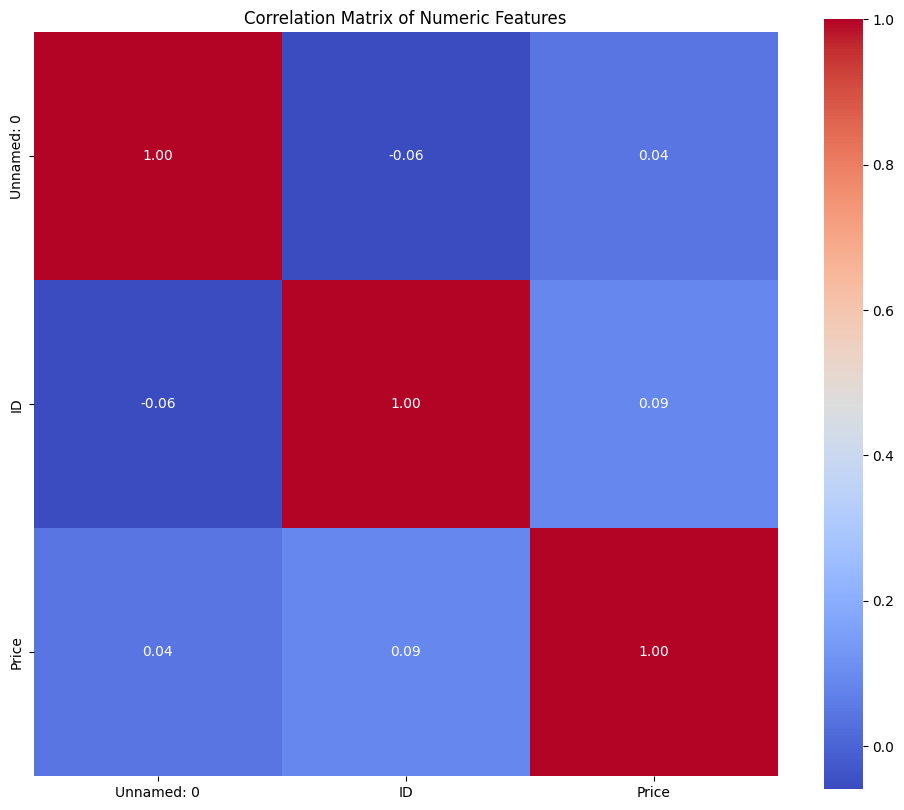

In [47]:
import seaborn as sns 
import matplotlib.pyplot as plt

numeric_data = df[numerical_columns]

#Compute pairwise correlation of numeric columns
correlation_matrix=numeric_data.corr()

#plotting correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix,annot = True, cmap='coolwarm',fmt=".2f",square=True)
plt.title("Correlation Matrix of Numeric Features")
plt.show()

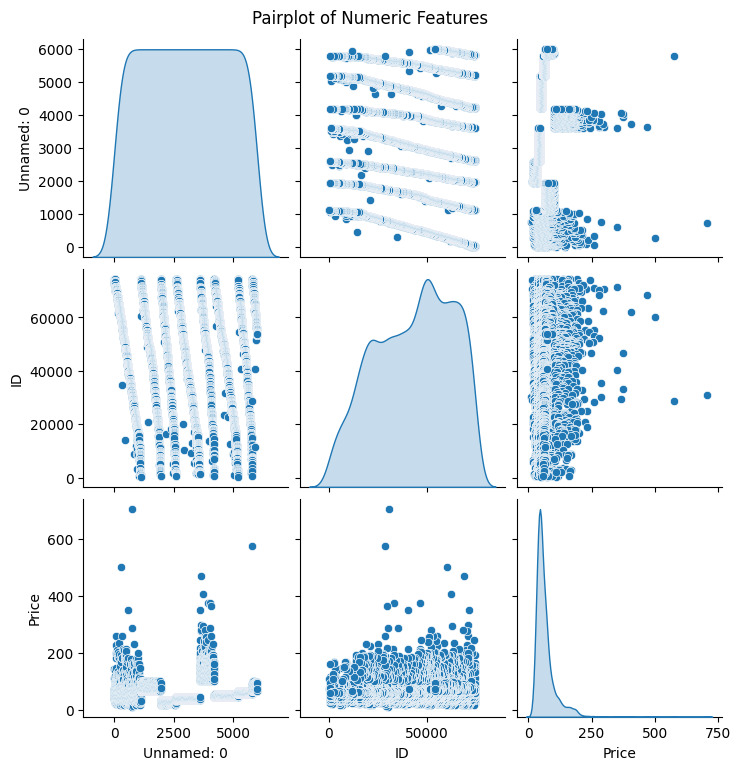

In [48]:
# Pairplot of numeric features
sns.pairplot(df[numerical_columns],diag_kind='kde')
plt.suptitle('Pairplot of Numeric Features',y=1.02)
plt.show()

In [49]:
df.head()

Unnamed: 0     ID                        Name             Brand Colour  \
0           0  74416         Runway stripe dress  Stella McCartney  beige   
1           1  73815  Reformation Kourtney Dress       Reformation  beige   
2           2  73801    Ivory Viola bridal dress             Ghost  beige   
3           3  73718     Pasu Dress - Rhino Tusk            Coucoo  beige   
4           4  73605                       Ellen              RIXO  beige   

  Catagories  Price  
0    dresses    111  
1    dresses     50  
2    dresses     75  
3    dresses     37  
4    dresses     47

In [50]:
print(list(df.columns))

['Unnamed: 0', 'ID', 'Name', 'Brand', 'Colour', 'Catagories', 'Price']


In [51]:
# Filter brands out with insufficient listings
brand_counts = df['Brand'].value_counts()
filtered_df = df[df['Brand'].isin(brand_counts[brand_counts >= 100].index)]

# Filter out price outliers
filtered_df = filtered_df.loc[filtered_df['Price'] < 200]

# Filter colours out with too few listings
colour_counts = filtered_df['Colour'].value_counts()
filtered_df = filtered_df[filtered_df['Colour'].isin(colour_counts[colour_counts >= 100].index)]

# Remaining data properties
print('Number of unique brands: ' + str(filtered_df['Brand'].nunique()))
print(filtered_df['Colour'].value_counts())
print('Remaining listings: ' + str(len(filtered_df)))



Number of unique brands: 9
Colour
black    1738
beige     404
Name: count, dtype: int64
Remaining listings: 2142


In [52]:
df['Name'].value_counts()

Name
Dress                             13
Selena Dress                       9
Ferreira Dress                     8
The Selena Dress                   6
Black dress                        6
                                  ..
The Goddess Dress                  1
Perry V-neck silk-stretch wrap     1
The Kinsley Maxi Dress in Turq     1
Cosmo teal ombré dress             1
Elena Dress Crystal Garden         1
Name: count, Length: 5609, dtype: int64

In [53]:
for column in df.columns:
    # Get unique values in the column 
    unique_values=df[column].unique()

    # Print the column name and its unique values
    print(f"Unique value in {column} column:")
    print(unique_values)
    print() #optional : for seperating outputs


Unique value in Unnamed: 0 column:
[   0    1    2 ... 5998 5999 6000]

Unique value in ID column:
[74416 73815 73801 ... 53890 53944 53962]

Unique value in Name column:
['Runway stripe dress' 'Reformation Kourtney Dress'
 'Ivory Viola bridal dress' ... 'The Kinsley Maxi Dress in Turq'
 'Cosmo teal ombré dress' 'SS18 SHEER SEQUIN BLUE MIDI']

Unique value in Brand column:
['Stella McCartney' 'Reformation' 'Ghost' 'Coucoo' 'RIXO' 'Stine Goya'
 'New Arrivals' 'Melissa Odabash' 'Rat & Boa' 'ROTATE BIRGER CHRISTENSEN'
 'alexandre vauthier' 'Farm Rio' 'Reiss' 'Gimaguas' 'House of CB'
 'Nadine Merabi' '& Other Stories' 'Ronny Kobo' 'H&M Studio' 'Galvan'
 'Aje' 'Johanna Sands' 'Andrea Iyamah' 'Burberry' 'Beulah London'
 'Maya Deluxe' 'Kitri' 'For Love and Lemons' 'Stella Nova' 'Ganni'
 'Camilla' 'MUGLER' 'Coco Fennell' 'Self-Portrait' 'Jacquemus'
 'Needle & Thread' 'FOREVER NEW' 'ALEMAIS' 'Olana' 'Sandro' 'Zimmermann'
 'Erdem' 'Iro' 'Sleeper' 'Ted Baker' 'Realisation Par' 'Valentino'
 'Moniq

In [54]:
df.to_csv('dataset/filtered_data.csv',index=False)

# Loading and working with the filtered data sets and analysis of the data

In [56]:
import pandas as pd
data = pd.read_csv('dataset/filtered_data.csv')

In [57]:
data.head(60)


Unnamed: 0     ID                            Name  \
0            0  74416             Runway stripe dress   
1            1  73815      Reformation Kourtney Dress   
2            2  73801        Ivory Viola bridal dress   
3            3  73718         Pasu Dress - Rhino Tusk   
4            4  73605                           Ellen   
5            5  73583     Elena Dress Crystal Garden    
6            6  73007                   OBlanc Dress    
7            7  73245                    Melody Dress   
8            8  73050                   Isamaya Dress   
9            9  73019  Belted Animal Print Mini Dress   
10          10  72873        Pasu Dress in Rhino Tusk   
11          11  72572  Embellished Strapless Midi Dre   
12          12  73572             Mark Dress Abstract   
13          13  72762                 Rose wrap dress   
14          14  73880                   Jade starfish   
15          15  72752           MARI SATIN MIDI DRESS   
16          16  72672                    JOANIE WHITE   
17          17  73348                       Bea Dress   
18          18  72570                   Bartola Dress   
19          19  73479     The Shantel in Ditsy Floral   
20          20  72634               Nula Sequin Dress   
21          21  72483                   SAMARIA DRESS   
22          22  74338               LUCIE WHITE DRESS   
23          23  74334                LULU WHITE DRESS   
24          24  72496              Cut-out midi dress   
25          25  72184           Darcy Open Back Knit    
26          26  73798        rhinestone bustier dress   
27          27  72072                    Freya dress    
28          28  72018        AJE Botanical Mini Dress   
29          29  72037                      Bran Dress   
30          30  74312    Amalfi dress (vintage print)   
31          31  71880     Fringed floral-print crepe    
32          32  71842             Hadasa Corset Dress   
33          33  71747             BURBERRY SILK DRESS   
34          34  71521                     Sonia dress   
35          35  74027                  Maya Maternity   
36          36  71685     Claire vintage plates dress   
37          37  74297                        Colette    
38          38  74296            The Didi Linen Dress   
39          39  74191          The Louisa maxi dress    
40          40  74243     Charlie Printed Shirt Dress   
41          41  71635                Tilden Mesh Maxi   
42          42  71781  Tribal Theory Bat Sleeve Dress   
43          43  73755            Rainbow Forest Maxi    
44          44  72900                    Assisi Dress   
45          45  71514    Leopard tie bank mini dress    
46          46  71821                    Laviza Dress   
47          47  71476   Aje P Drs Botanical App Dress   
48          48  73724                     Ombre dress   
49          49  71449                 Richelieu dress   
50          50  73144              Rose Collar Dress    
51          51  73141                   Lavinia dress   
52          52  72311       Lara Sequinned Mini dress   
53          53  70028    Joana Floral Silk Midi Dress   
54          54  72249       One shoulder spotty dress   
55          55  71426                   La Robe Maniu   
56          56  71380              Soar Like an Eagle   
57          57  71336      Harlequin Rose Ruffle Gown   
58          58  71127       Ruffle maxi dress floral    
59          59  71130                Wanda Fish Dress   

                        Brand Colour Catagories  Price  
0            Stella McCartney  beige    dresses    111  
1                 Reformation  beige    dresses     50  
2                       Ghost  beige    dresses     75  
3                      Coucoo  beige    dresses     37  
4                        RIXO  beige    dresses     47  
5                  Stine Goya  beige    dresses     64  
6                New Arrivals  beige    dresses    145  
7             Melissa Odabash  beige    dresses     52  
8            

In [58]:
# Display the first few rows and all columns 
pd.set_option('display.max_columns',None) 
print("First few rows of data:")
print(data.head())

First few rows of data:
   Unnamed: 0     ID                        Name             Brand Colour  \
0           0  74416         Runway stripe dress  Stella McCartney  beige   
1           1  73815  Reformation Kourtney Dress       Reformation  beige   
2           2  73801    Ivory Viola bridal dress             Ghost  beige   
3           3  73718     Pasu Dress - Rhino Tusk            Coucoo  beige   
4           4  73605                       Ellen              RIXO  beige   

  Catagories  Price  
0    dresses    111  
1    dresses     50  
2    dresses     75  
3    dresses     37  
4    dresses     47  


In [59]:
list(df.columns)

['Unnamed: 0', 'ID', 'Name', 'Brand', 'Colour', 'Catagories', 'Price']

In [60]:
data.drop(columns=['Colour'],axis=1,inplace=True)
data.head()

Unnamed: 0     ID                        Name             Brand Catagories  \
0           0  74416         Runway stripe dress  Stella McCartney    dresses   
1           1  73815  Reformation Kourtney Dress       Reformation    dresses   
2           2  73801    Ivory Viola bridal dress             Ghost    dresses   
3           3  73718     Pasu Dress - Rhino Tusk            Coucoo    dresses   
4           4  73605                       Ellen              RIXO    dresses   

   Price  
0    111  
1     50  
2     75  
3     37  
4     47

In [61]:
# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [62]:
# Drop numerical columns from the data
data_categorical = df.drop(columns=numerical_cols)

# Perform one-hot encoding on categorical columns
encoded_data = pd.get_dummies(data_categorical, columns=categorical_cols)

# Display the first few rows of the encoded data
print(encoded_data.head())

   Name_  REIGN BLACK SLEEVED KNIT MID  \
0                                False   
1                                False   
2                                False   
3                                False   
4                                False   

   Name_ Afternoon Aviary Bird Print Dress  Name_ Azalea Dress  \
0                                    False               False   
1                                    False               False   
2                                    False               False   
3                                    False               False   
4                                    False               False   

   Name_ Ba&sh Masha floral maxi dress  Name_ Bec & Bridge fleurette floral  \
0                                False                                False   
1                                False                                False   
2                                False                                False   
3                                F

In [63]:
np.mean(data['Price'])

np.float64(64.68905182469588)

In [64]:
np.std(data['Price'])

np.float64(39.873010741852404)

# Changing numerical columns through Standard Scalar

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Assuming encoded_data is already created from one hot encoding
# numerical_cols should be defined earlier as numerical columns from your data

# Pipeline for numerical columns
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

# Transform numerical columns
numerical_data = numerical_pipeline.fit_transform(df[numerical_cols])

# Convert transformed numerical data back to DataFrame
numerical_data_df = pd.DataFrame(numerical_data, columns=numerical_cols)

# Combine numerical and categorical data
final_data = pd.concat([encoded_data, numerical_data_df], axis=1)

# Convert final data to DataFrame
final_data_df = pd.DataFrame(final_data)

# Display the first few rows of the final processed data
print(final_data_df.head())


   Name_  REIGN BLACK SLEEVED KNIT MID  \
0                                False   
1                                False   
2                                False   
3                                False   
4                                False   

   Name_ Afternoon Aviary Bird Print Dress  Name_ Azalea Dress  \
0                                    False               False   
1                                    False               False   
2                                    False               False   
3                                    False               False   
4                                    False               False   

   Name_ Ba&sh Masha floral maxi dress  Name_ Bec & Bridge fleurette floral  \
0                                False                                False   
1                                False                                False   
2                                False                                False   
3                                F

In [67]:
categorical_cols

Index(['Name', 'Brand', 'Colour', 'Catagories'], dtype='object')

In [68]:
def available_clothes(price):
    available = df[df['Price'] <= price]
    return available[['Name', 'Brand', 'Catagories', 'Colour', 'Price']]

#Example usage: get clothes available for rent under the price of 50
price_limit = 50
available_clothes(price_limit)

Name                      Brand  \
1         Reformation Kourtney Dress                Reformation   
3            Pasu Dress - Rhino Tusk                     Coucoo   
4                              Ellen                       RIXO   
8                      Isamaya Dress                  Rat & Boa   
9     Belted Animal Print Mini Dress  ROTATE BIRGER CHRISTENSEN   
...                              ...                        ...   
5185                      Noir Night                Three Floor   
5186              Draped Crepe Dress              Self-Portrait   
5187         Knitted Geometric Dress                       Maje   
5188                 New Order Dress            Manning Cartell   
5189   Ambre One-Shoulder Midi Dress              Solace London   

                                             Catagories Colour  Price  
1                                               dresses  beige     50  
3                                               dresses  beige     37  
4                                               dresses  beige     47  
8                                               dresses  beige     38  
9                                               dresses  beige     39  
...                                                 ...    ...    ...  
5185  dresses, Lace, Formal, Winter, Summer, Seasona...  black     50  
5186  dresses, regular-fit, Formal, Winter, Summer, ...  black     46  
5187  dresses, Wool-Cashmere, Horizontal Stripe, Tub...  black     48  
5188  dresses, Cotton-Jersey, Tie-Front, Winter, Sum...  black     48  
5189  dresses, Smart, Seasonal, midi, 3/4 Sleeves, P...  black     50  

[2694 rows x 5 columns]

In [101]:
# Ensure that the columns exist in the DataFrame
print("Columns in the DataFrame:", df.columns)

# Iterate over each categorical column and print unique values
for col in categorical_cols:
    if col in df.columns:
        unique_values = df[col].unique()
        print(f"Unique values in '{col}' column:")
        for value in unique_values:
            print(value)
        print()  # Add a newline for better readability
    else:
        print(f"Column '{col}' does not exist in the DataFrame")

# Display DataFrame columns for verification
print("DataFrame Columns:", df.columns)

Columns in the DataFrame: Index(['Unnamed: 0', 'ID', 'Name', 'Brand', 'Colour', 'Catagories', 'Price',
       'available'],
      dtype='object')
Unique values in 'Name' column:
Runway stripe dress
Reformation Kourtney Dress
Ivory Viola bridal dress
 Pasu Dress - Rhino Tusk
Ellen
Elena Dress Crystal Garden 
OBlanc Dress 
Melody Dress
Isamaya Dress
Belted Animal Print Mini Dress
Pasu Dress in Rhino Tusk
Embellished Strapless Midi Dre
Mark Dress Abstract
Rose wrap dress
Jade starfish
MARI SATIN MIDI DRESS
JOANIE WHITE
Bea Dress
Bartola Dress
The Shantel in Ditsy Floral
Nula Sequin Dress
SAMARIA DRESS
LUCIE WHITE DRESS
LULU WHITE DRESS
Cut-out midi dress
Darcy Open Back Knit 
rhinestone bustier dress
Freya dress 
AJE Botanical Mini Dress
Bran Dress
Amalfi dress (vintage print)
Fringed floral-print crepe 
Hadasa Corset Dress
BURBERRY SILK DRESS
Sonia dress
Maya Maternity
Claire vintage plates dress
Colette 
The Didi Linen Dress
The Louisa maxi dress 
Charlie Printed Shirt Dress
Tilden Mesh

# Implementing Decision Tree

Training Accuracy: 1.00
Testing Accuracy: 1.00
Confusion Matrix:
[[956   0]
 [  0 245]]


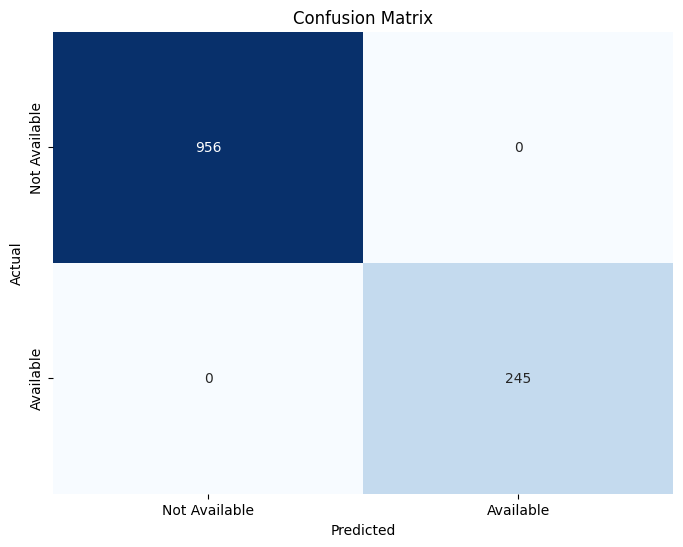

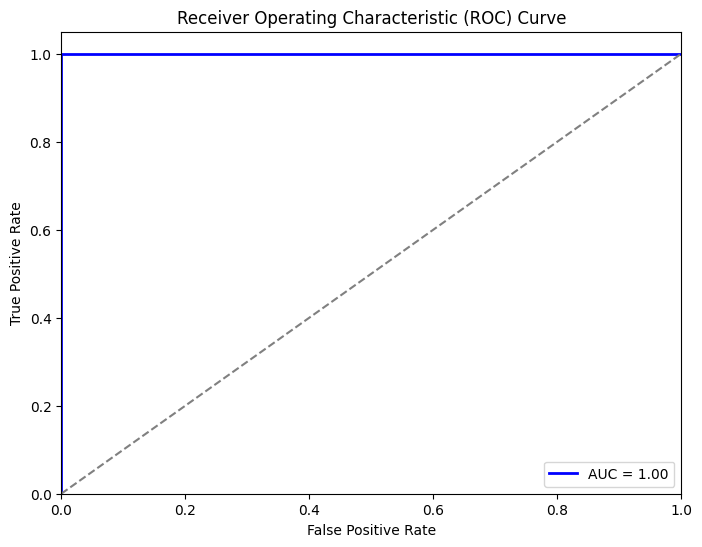

Model saved at ML_MODEL/decision_tree_model.pkl


In [95]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib

# Load the dataset
file_path = "C:\\Users\\DELL\\Desktop\\Dress_Rental_Analysis\\dataset\\dress_rental_prices.csv"
df = df=pd.read_csv('dataset/dress_rental_prices.csv', encoding='latin1')

# Define the price threshold for availability (e.g., available if price <= 50)
price_threshold = 40

# Create a new column 'available' based on the price threshold
df['available'] = df['Price'].apply(lambda x: 1 if x <= price_threshold else 0)

# Select features and target variable
X = df[['Price']]  # Only using 'Price' as the feature
y = df['available']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Decision Tree classifier
model = DecisionTreeClassifier(random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

# Generate confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(cm)

# Plot confusion matrix (optional)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Available', 'Available'], yticklabels=['Not Available', 'Available'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC score for test set
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Save the model to a folder named 'ML_MODEL'
if not os.path.exists('ML_MODEL'):
    os.makedirs('ML_MODEL')

model_path = 'ML_MODEL/decision_tree_model.pkl'
joblib.dump(model, model_path)
print(f'Model saved at {model_path}')

# Random Forest

Training Accuracy: 1.00
Testing Accuracy: 1.00
Confusion Matrix:
[[352   0]
 [  0 849]]


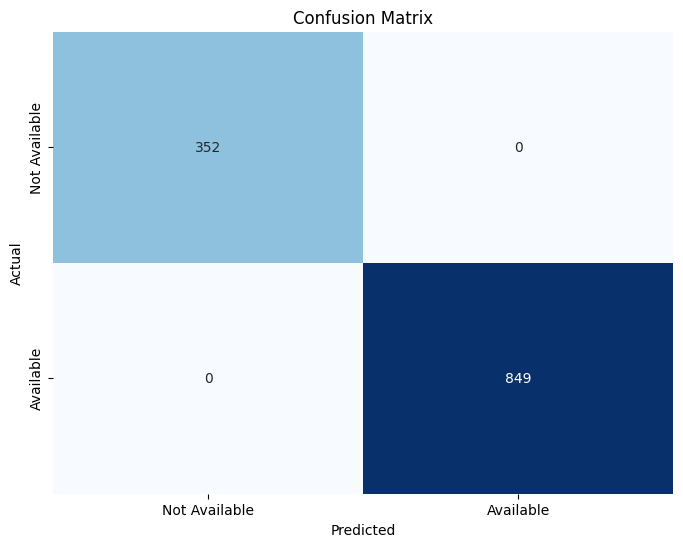

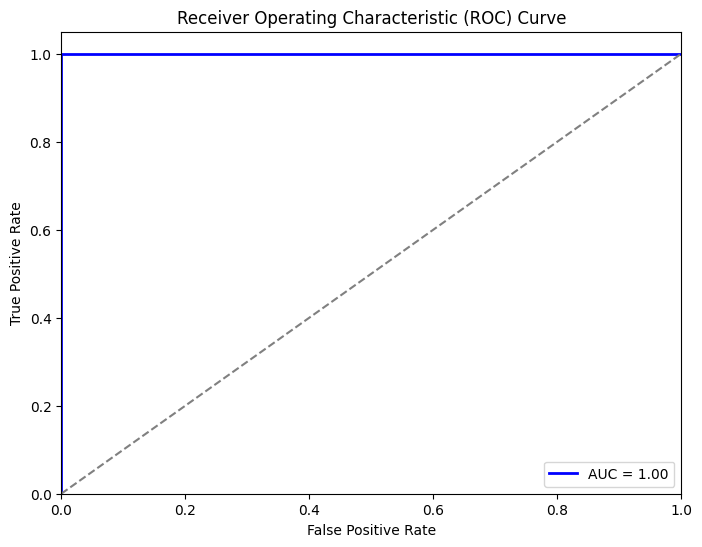

Model saved at ML_MODEL/random_forest_model.pkl


In [93]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib

# Load the dataset
file_path = "C:\\Users\\DELL\\Desktop\\Dress_Rental_Analysis\\dataset\\dress_rental_prices.csv"
df = df=pd.read_csv('dataset/dress_rental_prices.csv', encoding='latin1')

# Define the price threshold for availability (e.g., available if price <= 50)
price_threshold = 70

# Create a new column 'available' based on the price threshold
df['available'] = df['Price'].apply(lambda x: 1 if x <= price_threshold else 0)

# Select features and target variable
X = df[['Price']]  # Only using 'Price' as the feature
y = df['available']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier
model = RandomForestClassifier(random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

# Generate confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(cm)

# Plot confusion matrix (optional)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Available', 'Available'], yticklabels=['Not Available', 'Available'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC score for test set
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Save the model to a folder named 'ML_MODEL'
if not os.path.exists('ML_MODEL'):
    os.makedirs('ML_MODEL')

model_path = 'ML_MODEL/random_forest_model.pkl'
joblib.dump(model, model_path)
print(f'Model saved at {model_path}')


# Logistic Regreession

Training Accuracy: 1.00
Testing Accuracy: 1.00
Confusion Matrix:
[[689   0]
 [  0 512]]


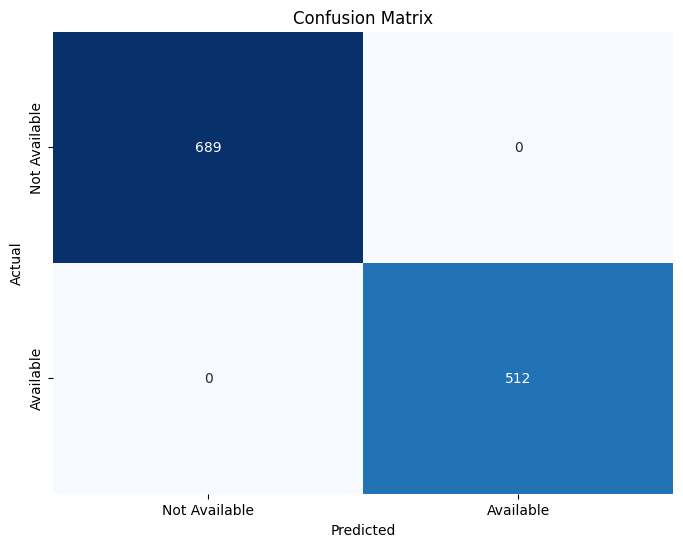

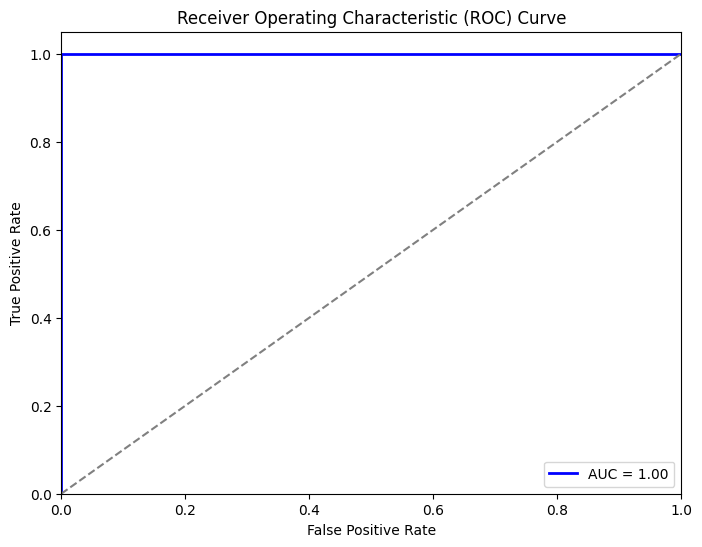

Model saved at ML_MODEL/logistic_regression_model.pkl


In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib

# Load the dataset
file_path = "C:\\Users\\DELL\\Desktop\\Dress_Rental_Analysis\\dataset\\dress_rental_prices.csv"
df = df=pd.read_csv('dataset/dress_rental_prices.csv', encoding='latin1')

# Define the price threshold for availability (e.g., available if price <= 50)
price_threshold = 50

# Create a new column 'available' based on the price threshold
df['available'] = df['Price'].apply(lambda x: 1 if x <= price_threshold else 0)

# Select features and target variable
X = df[['Price']]  # Only using 'Price' as the feature
y = df['available']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Logistic Regression classifier
model = LogisticRegression(random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

# Generate confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(cm)

# Plot confusion matrix (optional)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Available', 'Available'], yticklabels=['Not Available', 'Available'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC score for test set
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Save the model to a folder named 'ML_MODEL'
if not os.path.exists('ML_MODEL'):
    os.makedirs('ML_MODEL')

model_path = 'ML_MODEL/logistic_regression_model.pkl'
joblib.dump(model, model_path)
print(f'Model saved at {model_path}')

# KNN Algorithm

Training Accuracy: 1.00
Testing Accuracy: 1.00
Confusion Matrix:
[[ 150    0]
 [   0 1051]]


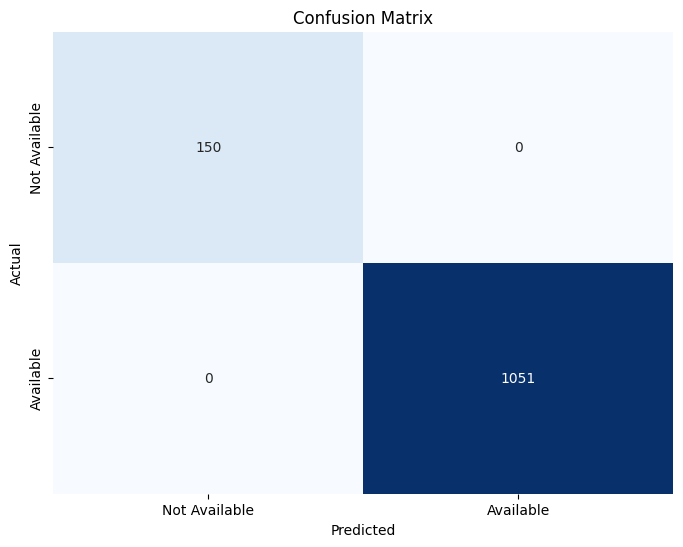

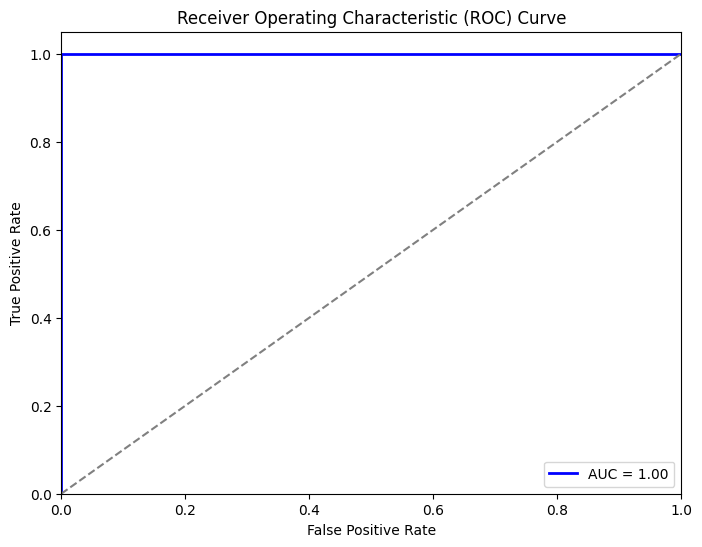

Model saved at ML_MODEL/knn_model.pkl


In [91]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib

# Load the dataset
file_path = r"C:\Users\DELL\Desktop\Dress_Rental_Analysis\dataset\dress_rental_prices.csv"
df = pd.read_csv(file_path, encoding='latin1')

# Define the price threshold for availability (e.g., available if price <= 50)
price_threshold = 100  # Changed threshold to make the data distribution more varied

# Create a new column 'available' based on the price threshold
df['available'] = df['Price'].apply(lambda x: 1 if x <= price_threshold else 0)

# Select features and target variable
X = df[['Price']]  # Only using 'Price' as the feature
y = df['available']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize KNN classifier
model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Fit the model
model.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

# Generate confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(cm)

# Plot confusion matrix (optional)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Available', 'Available'], yticklabels=['Not Available', 'Available'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC score for test set
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Save the model to a folder named 'ML_MODEL'
if not os.path.exists('ML_MODEL'):
    os.makedirs('ML_MODEL')

model_path = 'ML_MODEL/knn_model.pkl'
joblib.dump(model, model_path)
print(f'Model saved at {model_path}')


# GaussianNB

Training Accuracy: 0.92
Testing Accuracy: 0.94
Confusion Matrix:
[[623  66]
 [  8 504]]


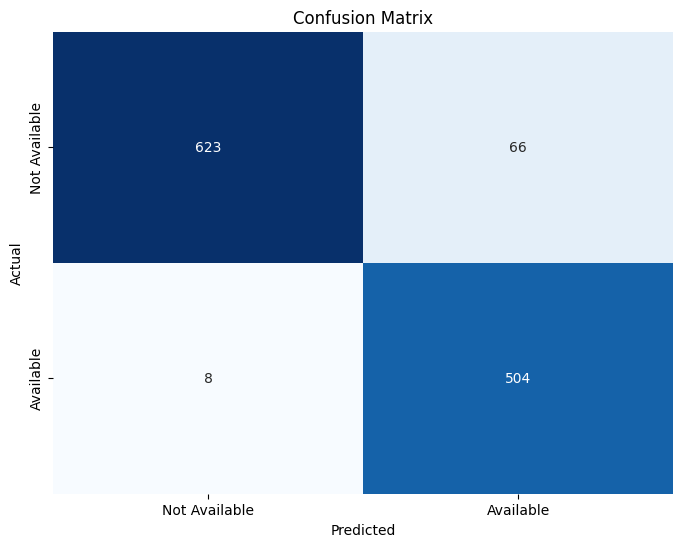

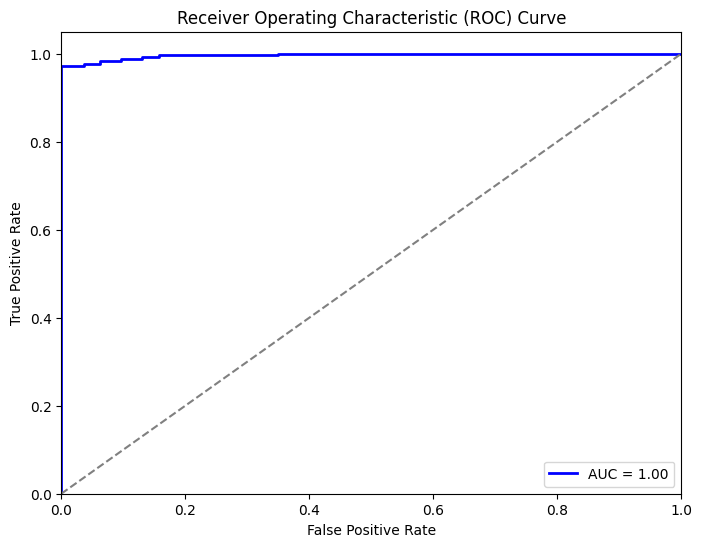

Model saved at ML_MODEL/naive_bayes_model.pkl


In [87]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib

# Load the dataset
file_path = "C:\\Users\\DELL\\Desktop\\Dress_Rental_Analysis\\dataset\\dress_rental_prices.csv"
df = df=pd.read_csv('dataset/dress_rental_prices.csv', encoding='latin1')

# Define the price threshold for availability (e.g., available if price <= 50)
price_threshold = 50

# Create a new column 'available' based on the price threshold
df['available'] = df['Price'].apply(lambda x: 1 if x <= price_threshold else 0)

# Select features and target variable
X = df[['Price']]  # Only using 'Price' as the feature
y = df['available']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Gaussian Naive Bayes classifier
model = GaussianNB()

# Fit the model
model.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Testing Accuracy: {test_accuracy:.2f}')

# Generate confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)
print('Confusion Matrix:')
print(cm)

# Plot confusion matrix (optional)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Available', 'Available'], yticklabels=['Not Available', 'Available'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC score for test set
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Save the model to a folder named 'ML_MODEL'
if not os.path.exists('ML_MODEL'):
    os.makedirs('ML_MODEL')

model_path = 'ML_MODEL/naive_bayes_model.pkl'
joblib.dump(model, model_path)
print(f'Model saved at {model_path}')